## Основы предобработки данных

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('display.precision', 3)

sns.set()

import warnings
warnings.filterwarnings('ignore')

### Загрузка данных и предварительный анализа

Dibetes dataset https://www.kaggle.com/uciml/pima-indians-diabetes-database 

In [3]:
diabetes_df = pd.read_csv('diabetes.csv', index_col=None)
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Выведите размерность набора

In [35]:
diabetes_df.shape

(768, 9)

#### Выведите первые 7 записей набора

In [36]:
diabetes_df[:7]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [37]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### В каких шкалах представлены признаки?

Ratio: все кроме outcome

In [38]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Изучение и обработка количественных признаков

In [39]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [40]:
diabetes_df.var()

Pregnancies                    11.354
Glucose                      1022.248
BloodPressure                 374.647
SkinThickness                 254.473
Insulin                     13281.180
BMI                            62.160
DiabetesPedigreeFunction        0.110
Age                           138.303
Outcome                         0.227
dtype: float64

In [41]:
diabetes_df.mean()

Pregnancies                   3.845
Glucose                     120.895
BloodPressure                69.105
SkinThickness                20.536
Insulin                      79.799
BMI                          31.993
DiabetesPedigreeFunction      0.472
Age                          33.241
Outcome                       0.349
dtype: float64

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

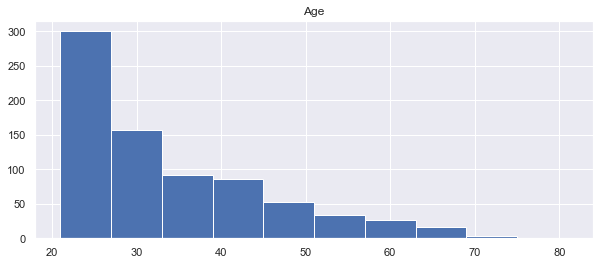

In [42]:
diabetes_df[['Age']].hist(figsize=(10, 4))

<AxesSubplot:>

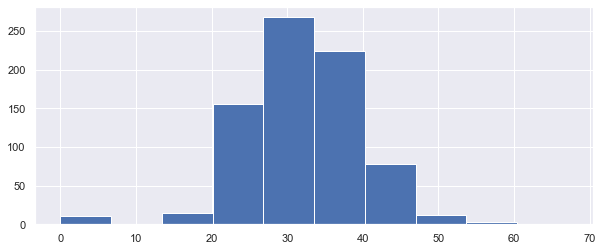

In [43]:
diabetes_df['BMI'].hist(figsize=(10, 4))

#### Как вывести гистограммы сразу для нескольких признаков?

array([[<AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>,
        <AxesSubplot:title={'center':'Insulin'}>]], dtype=object)

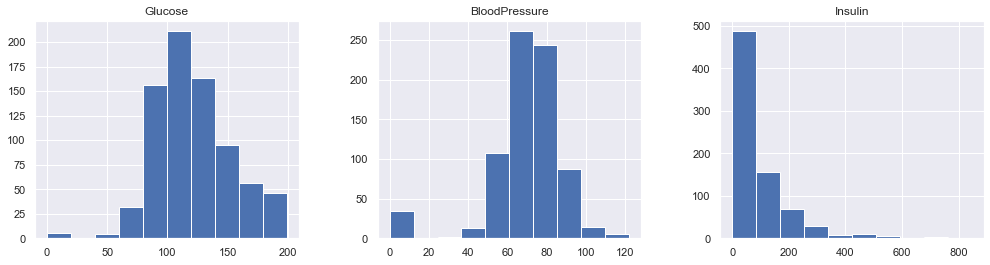

In [44]:
diabetes_df[['Glucose','BloodPressure','Insulin']].hist(figsize=(17, 4), layout=(1,3))

**Histograms vs. Kernel Density Estimation** <br>
https://mglerner.github.io/posts/histograms-and-kernel-density-estimation-kde-2.html?p=28 

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

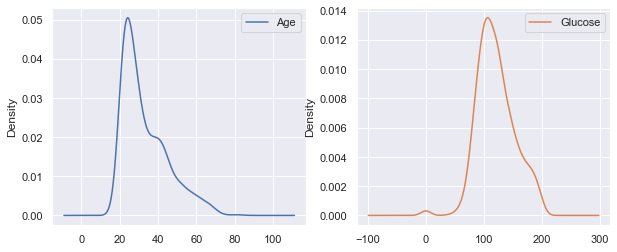

In [45]:
diabetes_df[['Age','Glucose']].plot(kind='density', layout=(1, 2), subplots=True,
                                    figsize=(10, 4), sharex=False)

<AxesSubplot:xlabel='Age', ylabel='Density'>

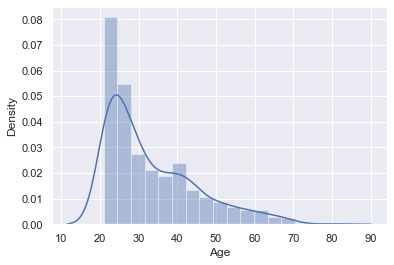

In [46]:
sns.distplot(diabetes_df['Age'])

### Обработка пропущенных значений

#### Поиск пропусков

In [47]:
no_zero_columns = list (set(diabetes_df.columns) -  set(['Outcome','Pregnancies']))

Процентное соотношение

In [48]:
(diabetes_df[no_zero_columns] == 0).mean()

BMI                         0.014
Glucose                     0.007
Insulin                     0.487
BloodPressure               0.046
SkinThickness               0.296
DiabetesPedigreeFunction    0.000
Age                         0.000
dtype: float64

In [49]:
no_zero_columns_final = list (['BMI','Glucose','BloodPressure'])

In [50]:
(diabetes_df[no_zero_columns_final] == 0).mean()

BMI              0.014
Glucose          0.007
BloodPressure    0.046
dtype: float64

#### Как заменить все пропуски на NaN?

In [90]:
diabetes_df[['BMI','Glucose','BloodPressure']] = diabetes_df[['BMI','Glucose','BloodPressure']].replace(0, np.nan, inplace=False)

In [91]:
diabetes_df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
720,4,83.0,86.0,19,0,29.3,0.317,34,0
253,0,86.0,68.0,32,0,35.8,0.238,25,0
363,4,146.0,78.0,0,0,38.5,0.520,67,1
614,11,138.0,74.0,26,144,36.1,0.557,50,1
301,2,144.0,58.0,33,135,31.6,0.422,25,1
108,3,83.0,58.0,31,18,34.3,0.336,25,0
319,6,194.0,78.0,0,0,23.5,0.129,59,1
265,5,96.0,74.0,18,67,33.6,0.997,43,0
730,3,130.0,78.0,23,79,28.4,0.323,34,1
519,6,129.0,90.0,7,326,19.6,0.582,60,0


In [92]:
diabetes_df.isnull().mean()

Pregnancies                 0.000
Glucose                     0.007
BloodPressure               0.046
SkinThickness               0.000
Insulin                     0.000
BMI                         0.014
DiabetesPedigreeFunction    0.000
Age                         0.000
Outcome                     0.000
dtype: float64

In [93]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,763.000,733.000,768.000,768.000,757.000,768.000,768.000,768.000
mean,3.845,121.687,72.405,20.536,79.799,32.457,0.472,33.241,0.349
std,3.370,30.536,12.382,15.952,115.244,6.925,0.331,11.760,0.477
min,0.000,44.000,24.000,0.000,0.000,18.200,0.078,21.000,0.000
25%,1.000,99.000,64.000,0.000,0.000,27.500,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.300,0.372,29.000,0.000
75%,6.000,141.000,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


<AxesSubplot:>

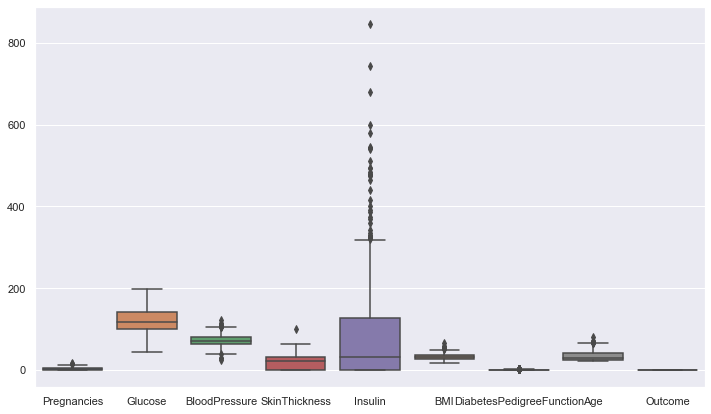

In [94]:
plt.subplots(figsize=(12,7))
sns.boxplot(data=diabetes_df)

#### Работа с пропусками

**"Плохие" способы:**

In [95]:

print ('Исходный размер: ', diabetes_df.shape)

    # Удаляем строки
print ('Удалили все строки с пропусками: ', diabetes_df.dropna(how='any', axis=0).shape)
print ('Удалили только полностью пустые строки: ', diabetes_df.dropna(how='all', axis=0).shape)

    # Удаляем столбцы
print ('Удалили все столбцы с пропусками: ', diabetes_df.dropna(how='any', axis=1).shape)
print ('Удалили только полностью пустые столбцы: ',diabetes_df.dropna(how='all', axis=1).shape)



Исходный размер:  (768, 9)
Удалили все строки с пропусками:  (724, 9)
Удалили только полностью пустые строки:  (768, 9)
Удалили все столбцы с пропусками:  (768, 6)
Удалили только полностью пустые столбцы:  (768, 9)


In [79]:
diabetes_df.isnull().mean()

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

**Удалить столбцы, в которых много пропущенных значение**

In [ ]:
diabetes_df = diabetes_df.loc[:, (diabetes_df.isnull().sum(axis=0) <= max_number_of_nas)]

**Заполняем пропуски**

In [ ]:

diabetes_df.fillna(diabetes_df.mean(), inplace=True)

# diabetes_df['Glucose'].fillna((diabetes['Glucose']).mode()[0], inplace=True)
# diabetes_df['BMI'].fillna((diabetes['BMI']).mean(), inplace=True)
# diabetes_df['Insulin'].fillna((diabetes['Insulin']).median(), inplace=True)

diabetes_df.isnull().sum()

### Обработка выбросов

In [ ]:
sns.boxplot(x='Insulin', data=diabetes_df)

In [ ]:
plt.subplots(figsize=(12,7))
sns.boxplot(data=diabetes_df)

**Winsorizing**

In [ ]:
diabetes_df['Insulin'] = diabetes_df.Insulin.clip(lower=diabetes_df.Insulin.quantile(0.05), 
                                                  upper=diabetes_df.Insulin.quantile(0.95))

In [ ]:
diabetes_df.shape

In [ ]:
plt.subplots(figsize=(12,7))
sns.boxplot(data=diabetes_df)

### Дискретизация данных (binning)

**Equal-width partitioning**


In [ ]:
diabetes_df['Age_equal'] = pd.cut(diabetes_df['Age'], 5)
diabetes_df.Age_equal.value_counts()

**Expert partitioning**

In [ ]:
bins = [0, 12, 19, 35, 60, 100]

group_names = ['Child', 'Teenager', 'Young', 'Adult','Elderly']

diabetes_df['Age_expert'] = pd.cut(diabetes_df['Age'], bins, labels=group_names)

diabetes_df.head(5)

In [ ]:
diabetes_df.Age_expert.value_counts()

### Изучение категориальных и бинарных признаков

In [ ]:
diabetes_df['Outcome'].value_counts()

In [ ]:
diabetes_df['Age_equal'].value_counts()

In [ ]:
diabetes_df['Age_expert'].value_counts()

In [ ]:
diabetes_df['Outcome'].hist(figsize=(10, 4))

In [ ]:
diabetes_df['Outcome'].value_counts().plot(kind='bar')

In [ ]:
sns.countplot(x='Outcome', data=diabetes_df)

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

sns.countplot(x='Age_expert', data=diabetes_df, ax=axes[0])
sns.countplot(x='Age_equal', data=diabetes_df, ax=axes[1])

### Изчение взаимодействия признаков

#### Только количественные признаки

In [ ]:
plt.scatter(diabetes_df['Glucose'], diabetes_df['Insulin'], color='red')

plt.title('Glucose and Insulin')
plt.xlabel('Glucose')
plt.ylabel('Insulin')

In [ ]:
sns.jointplot(x='Glucose', y='Insulin', data=diabetes_df, kind='scatter', color='orange')


In [ ]:
num_columns = list(set(diabetes_df.columns) -  set(['Outcome','Age_expert','Age_equal']))
sns.pairplot(diabetes_df[num_columns])

In [ ]:
corr_matrix = diabetes_df[num_columns].corr()
corr_matrix

In [ ]:
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":12})

#### Количественные и качественные признаки

In [ ]:
diabetes_df.pivot_table(['Glucose', 'Insulin'],['Outcome'], aggfunc='mean')

In [ ]:
sns.boxplot(x='Outcome', y='Glucose', data=diabetes_df)

In [ ]:
sns.lmplot('Glucose', 'Insulin', data=diabetes_df, hue='Outcome', fit_reg=False)

#### Только качественные признаки

In [ ]:
pd.crosstab(diabetes_df['Age_equal'], diabetes_df['Outcome'], margins=True)

In [ ]:
sns.set(rc = {'figure.figsize':(8, 8)})

sns.countplot(x='Age_equal', hue='Outcome', data=diabetes_df)

### Нормализация данных

In [ ]:
diabetes_df[['DiabetesPedigreeFunction','Insulin']].plot(kind='density', layout=(1, 2), sharex=False, figsize=(10, 4))

In [ ]:
sns.boxplot(data=diabetes_df[['DiabetesPedigreeFunction', 'Insulin']])

In [ ]:
std_scaler = StandardScaler().fit(diabetes_df[['DiabetesPedigreeFunction','Insulin']])

cols_std_scaled = std_scaler.transform(diabetes_df[['DiabetesPedigreeFunction','Insulin']])

minmax_scaler = MinMaxScaler().fit(diabetes_df[['DiabetesPedigreeFunction','Insulin']])

cols_minmax_scaled = minmax_scaler.transform(diabetes_df[['DiabetesPedigreeFunction','Insulin']])

type(cols_std_scaled)

In [ ]:
print('Mean after standardization:\nDiabetesPedigreeFunction={:.2f}, Insulin={:.2f}'
      .format(cols_std_scaled[:,0].mean(), cols_std_scaled[:,1].mean()))
print('\nStandard deviation after standardization:\nGlucose={:.2f}, Insulin={:.2f}\n'
      .format(cols_std_scaled[:,0].std(), cols_std_scaled[:,1].std()))

print('Mean after min-max scaling:\nDiabetesPedigreeFunction={:.2f}, Insulin={:.2f}'
      .format(cols_minmax_scaled[:,0].mean(), cols_minmax_scaled[:,1].mean()))
print('\nStandard deviation after min-max scaling:\nDiabetesPedigreeFunction={:.2f}, Insulin={:.2f}'
      .format(cols_minmax_scaled[:,0].std(), cols_minmax_scaled[:,1].std()))

In [ ]:
plt.figure(figsize=(8,6))
#plt.scatter(diabetes_df['DiabetesPedigreeFunction'], diabetes_df['Insulin'], color='orange', label='input scale', alpha=0.5)  
plt.scatter(cols_std_scaled[:,0], cols_std_scaled[:,1], color='red', label='Standardized', alpha=0.3)
plt.scatter(cols_minmax_scaled[:,0], cols_minmax_scaled[:,1], color='blue', 
            label='Min-max scaling ', alpha=0.3)
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Insulin')
plt.legend(loc='upper left')


In [ ]:
diabetes_df_scaled = pd.DataFrame(cols_std_scaled, columns = ['DiabetesPedigreeFunction', 'Insulin'])

diabetes_df_scaled[['DiabetesPedigreeFunction','Insulin']].plot(kind='density', layout=(1, 2), 
                                                                sharex=False, figsize=(10, 4))

In [ ]:
sns.boxplot(data=diabetes_df_scaled[['DiabetesPedigreeFunction', 'Insulin']])

In [ ]:

scaler = StandardScaler()
tr_diabetes_df = scaler.fit_transform(diabetes_df[['Pregnancies','Glucose', 'BloodPressure','SkinThickness',
                                                   'Insulin','BMI', 'DiabetesPedigreeFunction','Age']])

plt.subplots(figsize=(12,7))
sns.boxplot(data=tr_diabetes_df)